In [3]:
import pandas as pd
messages = pd.read_csv('6.csv', encoding='latin-1')
messages.head()
messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
messages = messages.rename(columns={'v1': 'class','v2': 'text'})

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
messages.head()
messages.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [41]:
messages['length'] = messages['text'].apply(len)
messages.head()

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB28395488>,
      dtype=object)

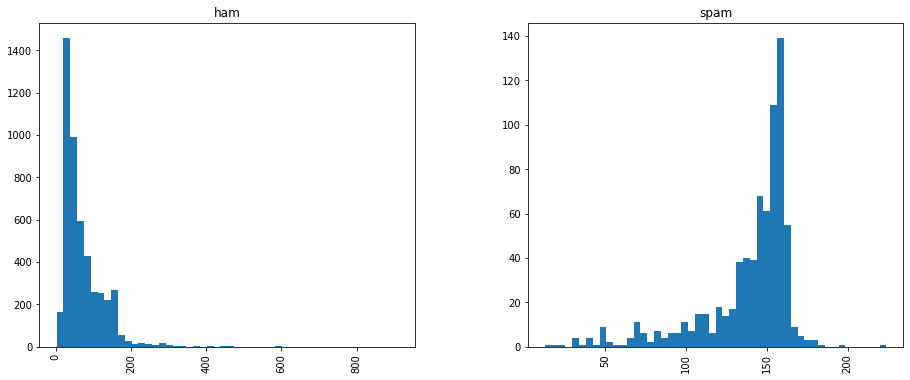

In [42]:
import matplotlib.pyplot as plt
messages.hist(column='length',by='class',bins=50, figsize=(15,6))

In [43]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [44]:
messages['text'].apply(process_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

In [45]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, class_train, class_test = train_test_split(messages['text'],messages['class'],test_size=0.2)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([('bow',CountVectorizer(analyzer=process_text)),
                     # converts strings to integer counts
                     ('tfidf',TfidfTransformer()),
                     # converts integer counts to weightedTF-IDF scores
                     ('classifier',MultinomialNB()) 
                     # train on TF-IDF vectors with NaiveBayes classifier
                    ])

In [47]:
pipeline.fit(msg_train,class_train)
predictions = pipeline.predict(msg_test)

In [48]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(class_test,predictions))
accuracy_score(class_test,predictions)

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       975
        spam       1.00      0.74      0.85       140

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



0.9668161434977578